## Optimization Project 1 : Linear Programming

### Group Memebers:

#### Sankalp Kulkarni (sk57727)
#### Anurag Sahu (as229468)
#### Janhavi Angati (ja54632)
#### Jyotis Joy (jj37257)


In [76]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
!pip install gurobipy

In [78]:
#Importing all the requried packages
import numpy as np
import pandas as pd
import gurobipy as gp
import matplotlib.pyplot as plt
from gurobipy import GRB
from prettytable import PrettyTable



In [79]:
#File paths
roi_data_path = "gdrive/My Drive/Colab Notebooks/ROI_data.csv"
roi_mat_path = "gdrive/My Drive/Colab Notebooks/roi_mat.csv"
index_data_path = "gdrive/My Drive/Colab Notebooks/index_data.csv"

#Read CSV files into DataFrames
roi_data = pd.read_csv(roi_data_path, index_col=0)
roi_mat = pd.read_csv(roi_mat_path, index_col=0)
index_data = pd.read_csv(index_data_path, index_col=0)

#Display the first few rows of each DataFrame
print("ROI Data:")
print(roi_data.head())

print("\nROI Matrix:")
print(roi_mat.head())

print("\nIndex Data:")
print(index_data.head())

ROI Data:
                           Print     TV    SEO  AdWords  Facebook  LinkedIn  \
Platform                                                                      
ROI                        0.031  0.049  0.024    0.039     0.016     0.024   
Second Firms ROI Estimate  0.049  0.023  0.024    0.039     0.044     0.046   

                           Instagram  Snapchat  Twitter  Email  
Platform                                                        
ROI                            0.046     0.026    0.033  0.044  
Second Firms ROI Estimate      0.026     0.019    0.037  0.026  

ROI Matrix:
          Print   TV  SEO  AdWords  Facebook  LinkedIn  Instagram  Snapchat  \
January     4.0  3.6  2.4      3.9       3.0       3.5        3.6      2.25   
February    4.0  3.9  2.7      3.8       4.3       3.2        2.7      1.80   
March       3.5  2.9  3.1      3.8       2.4       4.1        3.7      2.60   
April       3.8  3.1  2.4      4.4       2.4       3.8        3.7      2.50   
May  

In [80]:
#Declaring all requried variables:

budget = 10000000
social_media_list = ['Facebook', 'LinkedIn', 'Instagram', 'Snapchat', 'Twitter']

In [81]:
#Taking the list of columns from the files

mediums = roi_data.columns.tolist()
mediums

['Print',
 'TV',
 'SEO',
 'AdWords',
 'Facebook',
 'LinkedIn',
 'Instagram',
 'Snapchat',
 'Twitter',
 'Email']

In [82]:
#Reading the roi values from the first row of the ROI file (ROI expectations from the first consultancy)
roi_values = roi_data.iloc[0].to_dict()
roi_values

{'Print': 0.031,
 'TV': 0.049,
 'SEO': 0.024,
 'AdWords': 0.039,
 'Facebook': 0.016,
 'LinkedIn': 0.024,
 'Instagram': 0.046,
 'Snapchat': 0.026,
 'Twitter': 0.033,
 'Email': 0.044}

In [83]:
#Reading the roi values from the second row of the ROI file (ROI expectations from the second consultancy)
roi_values_1 = roi_data.iloc[1].to_dict()
roi_values_1

{'Print': 0.049,
 'TV': 0.023,
 'SEO': 0.024,
 'AdWords': 0.039,
 'Facebook': 0.044,
 'LinkedIn': 0.046,
 'Instagram': 0.026,
 'Snapchat': 0.019,
 'Twitter': 0.037,
 'Email': 0.026}

# Task 1 to 3

###Formulate the marketing budget allocation problem as a linear program. Use gurobi to find the optimal budget allocation.

Optimal ROI: 456.00 K

+-----------+---------------------+----------------------------+
|  Platform | Is Budget Allocated | Amount to be Invested ($M) |
+-----------+---------------------+----------------------------+
|     TV    |         Yes         |          $3.00 M           |
| Instagram |         Yes         |          $3.00 M           |
|   Email   |         Yes         |          $3.00 M           |
|  AdWords  |         Yes         |          $1.00 M           |
|  Twitter  |          No         |          $0.00 M           |
|  Snapchat |          No         |          $0.00 M           |
|    SEO    |          No         |          $0.00 M           |
|   Print   |          No         |          $0.00 M           |
|  LinkedIn |          No         |          $0.00 M           |
|  Facebook |          No         |          $0.00 M           |
+-----------+---------------------+----------------------------+


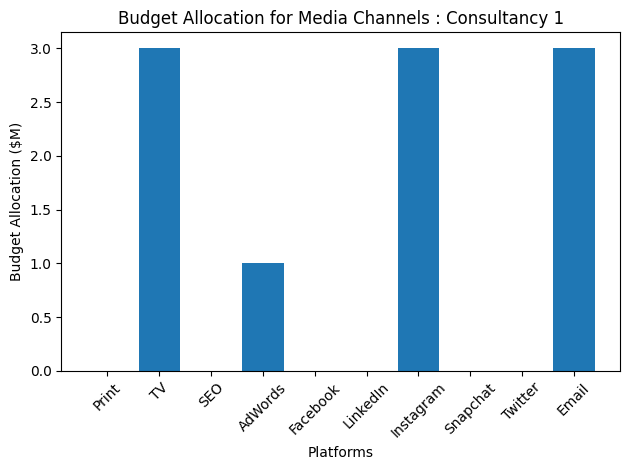

In [84]:
#Initiating the setup for the model
m = gp.Model()

#Defining the decision variables directly within a dictionary
decision_vars = {}
for medium in mediums:
    decision_vars[medium] = m.addVar(lb=0, ub=3000000, vtype=GRB.CONTINUOUS, name=medium)

#Setting objective function (maximizing ROI)
m.setObjective(gp.quicksum(roi_values[medium] * decision_vars[medium] for medium in mediums), GRB.MAXIMIZE)
objective_1st=m.setObjective(gp.quicksum(roi_values[medium] * decision_vars[medium] for medium in mediums), GRB.MAXIMIZE) #storing the components of the results

# Adding constraints 1, 2 and 3:

#Constrint 1 :Print and TV <= Facebook and Email
m.addConstr(decision_vars['Print'] + decision_vars['TV'] <= decision_vars['Facebook'] + decision_vars['Email']) #Print and TV <= Facebook and Email

#Constraint 2: The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter)should be at least twice of SEO and AdWords.
# i.e. Social media >= 2 * (SEO + AdWords)
m.addConstr(gp.quicksum(decision_vars[medium] for medium in social_media_list) >= 2 * (decision_vars['SEO'] + decision_vars['AdWords']))

#Constraint 3 : For each platform, the amount invested should be no more than $3M
#Already accounted for while specifying upper bound in the decision variables

#Total Budget constraint:
m.addConstr(gp.quicksum(decision_vars[medium] for medium in mediums) <= budget)

# Solving the LP
m.Params.OutputFlag=0 #Avoiding unnecesary updates from Gurobi
m.optimize() #Actually solving to optimize


#Printing Optimized solution
optimal_roi = m.objVal / 1e3  # Convert to thousands
print(f"Optimal ROI: {optimal_roi:.2f} K\n")


# Create a table
table = PrettyTable()
table.field_names = ["Platform", "Is Budget Allocated", "Amount to be Invested ($M)"]

# Add rows to the table
for medium in mediums:
    is_budget_allocated = "Yes" if decision_vars[medium].x > 0 else "No"
    amount_in_millions = decision_vars[medium].x / 1e6  # Convert to millions
    table.add_row([medium, is_budget_allocated, "$"f"{amount_in_millions:.2f} M"])

# Sort the table by "Amount to be Invested" in descending order
table.sortby = "Amount to be Invested ($M)"
table.reversesort = True

# Print the table
print(table)

# Plotting a bar chart for budget allocation
plt.bar(mediums, [decision_vars[medium].x / 1e6 for medium in mediums])  # Convert to millions
plt.xlabel("Platforms")
plt.ylabel("Budget Allocation ($M)")
plt.title("Budget Allocation for Media Channels : Consultancy 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 4

### Using the second firm's estimate to run the model and check for budget allocation

Optimal ROI: 456.00 K

+-----------+---------------------+----------------------------+
|  Platform | Is Budget Allocated | Amount to be Invested ($M) |
+-----------+---------------------+----------------------------+
|   Print   |         Yes         |          $3.00 M           |
|  LinkedIn |         Yes         |          $3.00 M           |
|  Facebook |         Yes         |          $3.00 M           |
|  AdWords  |         Yes         |          $1.00 M           |
|  Twitter  |          No         |          $0.00 M           |
|     TV    |          No         |          $0.00 M           |
|  Snapchat |          No         |          $0.00 M           |
|    SEO    |          No         |          $0.00 M           |
| Instagram |          No         |          $0.00 M           |
|   Email   |          No         |          $0.00 M           |
+-----------+---------------------+----------------------------+


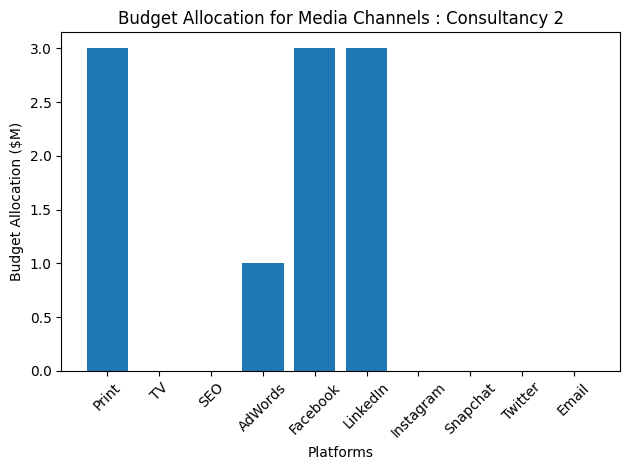

In [85]:
#Initiating the setup for the model
m1 = gp.Model()

#Defining the decision variables directly within a dictionary
decision_vars = {}
for medium in mediums:
    decision_vars[medium] = m1.addVar(lb=0, ub=3000000, vtype=GRB.CONTINUOUS, name=medium)

#Setting objective function (maximizing ROI)
m1.setObjective(gp.quicksum(roi_values_1[medium] * decision_vars[medium] for medium in mediums), GRB.MAXIMIZE)

# Adding constraints 1, 2 and 3:

#Constrint 1 :Print and TV <= Facebook and Email
m1.addConstr(decision_vars['Print'] + decision_vars['TV'] <= decision_vars['Facebook'] + decision_vars['Email']) #Print and TV <= Facebook and Email

#Constraint 2: The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter)should be at least twice of SEO and AdWords.
# i.e. Social media >= 2 * (SEO + AdWords)
m1.addConstr(gp.quicksum(decision_vars[medium] for medium in social_media_list) >= 2 * (decision_vars['SEO'] + decision_vars['AdWords']))

#Constraint 3 : For each platform, the amount invested should be no more than $3M
#Already accounted for while specifying upper bound in the decision variables

#Total Budget constraint:
m1.addConstr(gp.quicksum(decision_vars[medium] for medium in mediums) <= budget)

# Solving the LP
m1.Params.OutputFlag=0 #Avoiding unnecesary updates from Gurobi
m1.optimize() #Actually solving to optimize

#Printing Optimized solution
optimal_roi = m1.objVal / 1e3  # Convert to thousands
print(f"Optimal ROI: {optimal_roi:.2f} K\n")


# Create a table
table = PrettyTable()
table.field_names = ["Platform", "Is Budget Allocated", "Amount to be Invested ($M)"]

# Add rows to the table
for medium in mediums:
    is_budget_allocated = "Yes" if decision_vars[medium].x > 0 else "No"
    amount_in_millions = decision_vars[medium].x / 1e6  # Convert to millions
    table.add_row([medium, is_budget_allocated, "$"f"{amount_in_millions:.2f} M"])

# Sort the table by "Amount to be Invested" in descending order
table.sortby = "Amount to be Invested ($M)"
table.reversesort = True

# Print the table
print(table)

# Plotting a bar chart for budget allocation
plt.bar(mediums, [decision_vars[medium].x / 1e6 for medium in mediums])  # Convert to millions
plt.xlabel("Platforms")
plt.ylabel("Budget Allocation ($M)")
plt.title("Budget Allocation for Media Channels : Consultancy 2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 5

**Q: Are the allocations the same?**

**Answer**:

Optimal value remains same i.e. $456,000.

As we can see from both the tables and the charts, **the allocations are not same.**

Since our objective function is based on the ROI expectation from the medium and given the fact that both consultancies are expecting different set of platforms will provide better returns, it makes sense that these allocations are not the same.

In [86]:
#Reading the expected ROI of 1st consultancy
obj = np.array(roi_data.iloc[0][0:])
obj

array([0.031, 0.049, 0.024, 0.039, 0.016, 0.024, 0.046, 0.026, 0.033,
       0.044])

In [87]:
#Reading the expected ROI of 2nd consultancy
obj1 = np.array(roi_data.iloc[1][0:])
obj1

array([0.049, 0.023, 0.024, 0.039, 0.044, 0.046, 0.026, 0.019, 0.037,
       0.026])

**Q:Assuming the first ROI data is correct, if you were to use the
second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)?**

In [88]:
#Substracting the optimal solution from solution with allocation as per 2nd consultancy
diff_1 = m.objVal-sum((obj*m1.x))

print("The objective will get lowered by: {:.2f} ".format(diff_1))

The objective will get lowered by: 204000.00 


**Answer** :

Thus, if we assume that ROI expectations from the 1st consultancy is accurate but if we follow the budget allocation as per best ROI results of 2nd consultancy, **our ROI will get lowered by $204K.**

**Q:Assuming the second ROI data is correct, if you used the first
allocation how much lower would the objective be relative to the optimal objective?**

In [89]:
#Substracting the optimal solution from solution with allocation as per 1st consultancy
diff_2 = m1.objVal-sum((obj1*m.x))

print("The objective will get lowered by:{:.2f} ".format(diff_2))

The objective will get lowered by:192000.00 


**Answer** :

In this scenario, **our ROI will get lowered by $192K.**

**Q: Do you think the third constraint above, based on your boss’ experience, is useful?**

Optimal ROI: 465.00 K

+-----------+---------------------+----------------------------+
|  Platform | Is Budget Allocated | Amount to be Invested ($M) |
+-----------+---------------------+----------------------------+
|     TV    |         Yes         |          $5.00 M           |
|   Email   |         Yes         |          $5.00 M           |
|  Twitter  |          No         |          $0.00 M           |
|  Snapchat |          No         |          $0.00 M           |
|    SEO    |          No         |          $0.00 M           |
|   Print   |          No         |          $0.00 M           |
|  LinkedIn |          No         |          $0.00 M           |
| Instagram |          No         |          $0.00 M           |
|  Facebook |          No         |          $0.00 M           |
|  AdWords  |          No         |          $0.00 M           |
+-----------+---------------------+----------------------------+


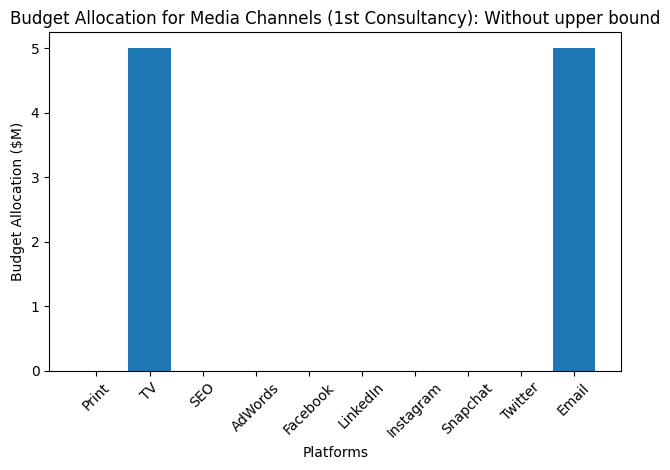

In [90]:
# For the first firm ROI Values [variable named as roi_values]

#Initiating the setup for the model
m2 = gp.Model()

# Defining the decision variables directly within a dictionary and removing the 3rd constraint
decision_vars = {}
for medium in mediums:
    decision_vars[medium] = m2.addVar(lb=0, vtype=GRB.CONTINUOUS, name=medium)  # Removed the ub parameter i.e. removing the 3rd constraint

# Setting objective function (maximizing ROI)
m2.setObjective(gp.quicksum(roi_values[medium] * decision_vars[medium] for medium in mediums), GRB.MAXIMIZE)

# Adding constraints
m2.addConstr(decision_vars['Print'] + decision_vars['TV'] <= decision_vars['Facebook'] + decision_vars['Email'])
m2.addConstr(gp.quicksum(decision_vars[medium] for medium in social_media_list) >= 2 * (decision_vars['SEO'] + decision_vars['AdWords']))
m2.addConstr(gp.quicksum(decision_vars[medium] for medium in mediums) <= budget)

# Solving the LP
m2.Params.OutputFlag=0 #Avoiding unnecesary updates from Gurobi
m2.optimize()

#Printing Optimized solution
optimal_roi = m2.objVal / 1e3  # Convert to thousands
print(f"Optimal ROI: {optimal_roi:.2f} K\n")


# Create a table
table = PrettyTable()
table.field_names = ["Platform", "Is Budget Allocated", "Amount to be Invested ($M)"]

# Add rows to the table
for medium in mediums:
    is_budget_allocated = "Yes" if decision_vars[medium].x > 0 else "No"
    amount_in_millions = decision_vars[medium].x / 1e6  # Convert to millions
    table.add_row([medium, is_budget_allocated, "$"f"{amount_in_millions:.2f} M"])

# Sort the table by "Amount to be Invested" in descending order
table.sortby = "Amount to be Invested ($M)"
table.reversesort = True

# Print the table
print(table)

# Plotting a bar chart for budget allocation
plt.bar(mediums, [decision_vars[medium].x / 1e6 for medium in mediums])  # Convert to millions
plt.xlabel("Platforms")
plt.ylabel("Budget Allocation ($M)")
plt.title("Budget Allocation for Media Channels (1st Consultancy): Without upper bound")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Answer**:

In this simulation, we end up with a solution which **boosts the outcome by ~$0.9M.** i.e. we will attain better returns. However, the budget is allocated only to the 2 platforms. Thus, if followed this route, we will restrict ourselves to only the audience expose to these platforms and miss out on potential set of audience who are engaging with the other platforms.

Hence, we recommend to stick to the optimal solution that we have achived with objective value of $456K.

Let us check if we can get higher objective and wider presence if we follow the ROI expectations of 2nd consultancy

Optimal ROI: 465.00 K

+-----------+---------------------+----------------------------+
|  Platform | Is Budget Allocated | Amount to be Invested ($M) |
+-----------+---------------------+----------------------------+
|   Print   |         Yes         |          $5.00 M           |
|  Facebook |         Yes         |          $5.00 M           |
|  Twitter  |          No         |          $0.00 M           |
|     TV    |          No         |          $0.00 M           |
|  Snapchat |          No         |          $0.00 M           |
|    SEO    |          No         |          $0.00 M           |
|  LinkedIn |          No         |          $0.00 M           |
| Instagram |          No         |          $0.00 M           |
|   Email   |          No         |          $0.00 M           |
|  AdWords  |          No         |          $0.00 M           |
+-----------+---------------------+----------------------------+


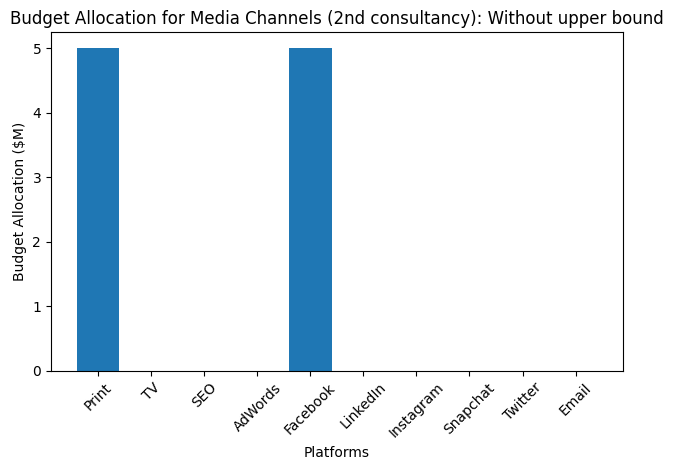

In [91]:
#For second firm ROI values [variable named as roi_values_1]

#Initiating the setup for the model
m3 = gp.Model()

#Defining the decision variables directly within a dictionary and removing the 3rd constraint
decision_vars = {}
for medium in mediums:
    decision_vars[medium] = m3.addVar(lb=0, vtype=GRB.CONTINUOUS, name=medium)  # Removed the ub parameter

#Setting objective function (maximizing ROI)
m3.setObjective(gp.quicksum(roi_values_1[medium] * decision_vars[medium] for medium in mediums), GRB.MAXIMIZE)

#Adding constraints
m3.addConstr(decision_vars['Print'] + decision_vars['TV'] <= decision_vars['Facebook'] + decision_vars['Email'])
m3.addConstr(gp.quicksum(decision_vars[medium] for medium in social_media_list) >= 2 * (decision_vars['SEO'] + decision_vars['AdWords']))
m3.addConstr(gp.quicksum(decision_vars[medium] for medium in mediums) <= budget)

#Solving the LP
m3.Params.OutputFlag=0 #Avoiding unnecesary updates from Gurobi
m3.optimize()

#Printing Optimized solution
optimal_roi = m3.objVal / 1e3  # Convert to thousands
print(f"Optimal ROI: {optimal_roi:.2f} K\n")


#Create a table
table = PrettyTable()
table.field_names = ["Platform", "Is Budget Allocated", "Amount to be Invested ($M)"]

#Add rows to the table
for medium in mediums:
    is_budget_allocated = "Yes" if decision_vars[medium].x > 0 else "No"
    amount_in_millions = decision_vars[medium].x / 1e6  # Convert to millions
    table.add_row([medium, is_budget_allocated, "$"f"{amount_in_millions:.2f} M"])

#Sort the table by "Amount to be Invested" in descending order
table.sortby = "Amount to be Invested ($M)"
table.reversesort = True

#Print the table
print(table)

# Plotting a bar chart for budget allocation
plt.bar(mediums, [decision_vars[medium].x / 1e6 for medium in mediums])  # Convert to millions
plt.xlabel("Platforms")
plt.ylabel("Budget Allocation ($M)")
plt.title("Budget Allocation for Media Channels (2nd consultancy): Without upper bound")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Answer**:

In this scenario, we observe that new objective is same and higher than the one with constraint 3. However, we still find that the budget is allocated to only 2 of the 10 available platforms and hence as per the reasoning shared above, it makes more business sense to move ahead with the optimal solution obtained in presence of boss's constraint.

In conclusion, although the third constraint is not useful from a pure data point of view as we might get better returns by removing it, holistically, it will be useful and we should maintain it as having the third constraint will enable us to diversify our marketing investment rather than depending on only a couple of platforms.

# Task 6

To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data.
Use the first ROI data as your starting point. By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

In [92]:
#In this code, we are identifying range of values that expected ROI of each platform can take resulting into same optimal allocation
#that we got in step 3

#definig the dataframe and columns
#using the SAObjLow and SAObjUp for getting lower and upper limits repectively

Sensitivity_df = pd.DataFrame({
    'Platform': roi_data.columns,
    'Lower Limit': m.SAObjLow,
    'Curr ROI': roi_data.iloc[0].values,
    'Upper Limit': m.SAObjUp
})

from tabulate import tabulate

#Print the DataFrame using tabulate
print(tabulate(Sensitivity_df, headers='keys', tablefmt='pretty', showindex=False))


+-----------+----------------------+----------+----------------------+
| Platform  |     Lower Limit      | Curr ROI |     Upper Limit      |
+-----------+----------------------+----------+----------------------+
|   Print   |         -inf         |  0.031   |        0.049         |
|    TV     |        0.039         |  0.049   |        0.062         |
|    SEO    |         -inf         |  0.024   |        0.039         |
|  AdWords  |        0.033         |  0.039   |        0.046         |
| Facebook  |         -inf         |  0.016   | 0.028999999999999998 |
| LinkedIn  |         -inf         |  0.024   |        0.039         |
| Instagram |        0.039         |  0.046   |         inf          |
| Snapchat  |         -inf         |  0.026   |        0.039         |
|  Twitter  |         -inf         |  0.033   |        0.039         |
|   Email   | 0.028999999999999998 |  0.044   |         inf          |
+-----------+----------------------+----------+----------------------+


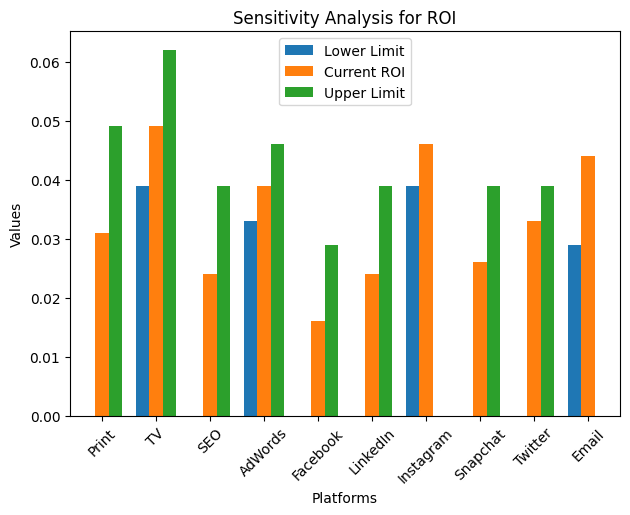

In [97]:
#Representing above graphically:

# Plotting the grouped bar chart
x = np.arange(len(Sensitivity_df['Platform']))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, Sensitivity_df['Lower Limit'], width, label='Lower Limit')
rects2 = ax.bar(x, Sensitivity_df['Curr ROI'], width, label='Current ROI')
rects3 = ax.bar(x + width, Sensitivity_df['Upper Limit'], width, label='Upper Limit')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Platforms')
ax.set_ylabel('Values')
ax.set_title('Sensitivity Analysis for ROI')
ax.set_xticks(x)
ax.set_xticklabels(Sensitivity_df['Platform'])
ax.legend()

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()



Using the first ROI as the starting point, we can vary the expected ROIs for each platform in their respective range in the table above. For these range of values, the optimal solution will remain the same.

# Task 7

Your boss has gained permission to reinvest half of the return. For example, if the marketing
obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% =
$10.2M. The monthly ROI for next year is given in an attached csv file. The three constraints
given by your boss are still in place for each month. What is the optimal allocation for each
month?

In [94]:
#Going to use this for indexing the output for task 7
from copy import deepcopy
x=deepcopy(roi_mat.T)
x.columns

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [95]:
months = roi_mat.index.tolist()
# Initialize an empty dictionary to store the results for each month
results_by_month = {}
results =[]

# Initialize obmax
budget_new = 10000000 #Declared it here separately to make it easier to build the futuristic view by tweaking the budget here itself

# Iterate through each month
for month in months:
    # Extract ROI values for the current month
    roi_values = roi_mat.loc[month].to_dict()
    #print(roi_values)
    # Create a new model for the current month
    m4 = gp.Model()
    # Define decision variables for budget allocation for each medium
    decision_vars = {}
    for medium in mediums:
        decision_vars[medium] = m4.addVar(lb=0, ub=3000000, vtype=GRB.CONTINUOUS, name=medium)
    # Set the objective function to maximize ROI
    m4.setObjective(gp.quicksum(roi_values[medium] * decision_vars[medium] for medium in mediums), GRB.MAXIMIZE)
    #print(budget)
    # Add constraints (constraints 1, 2, and 3 as specified by your boss)
    m4.addConstr(decision_vars['Print'] + decision_vars['TV'] <= decision_vars['Facebook'] + decision_vars['Email'])
    m4.addConstr(gp.quicksum(decision_vars[medium] for medium in social_media_list) >= 2 * (decision_vars['SEO'] + decision_vars['AdWords']))
    m4.addConstr(gp.quicksum(decision_vars[medium] for medium in mediums) <= budget_new)
    # Solve the LP for the current month
    m4.Params.OutputFlag=0 #Avoiding unnecessary updates from Gurobi
    m4.optimize()
    #print(m4.x)

    #Update obmax
    #arr = np.array(list({medium: decision_vars[medium].x for medium in mediums}.values()), dtype='float32')
    arr = m4.ObjVal
    ret = (arr/budget_new)/100
    #print(ret)
    budget_new = 10000000 + ((ret * 0.5) * 10000000)
    results.append(m4.x)

df_monthly=pd.DataFrame(data=results,columns=roi_data.columns,index=x.columns)
df_monthly/1000000

df_monthly['Total Budget'] = df_monthly.sum(axis=1)
df_monthly_in_millions = df_monthly / 1000000

df_monthly_in_millions


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total Budget
January,3.000000,0.000000,0.0,1.333333,0.000000,0.0,2.666667,0.0,0.000000,3.000000,10.000000
February,3.000000,0.000000,0.0,2.395500,3.000000,0.0,0.000000,0.0,1.791000,0.000000,10.186500
March,0.000000,0.000000,0.0,3.000000,0.000000,3.0,1.199429,0.0,3.000000,0.000000,10.199429
April,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,1.199707,0.000000,10.199707
May,1.196177,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,3.000000,10.196177
June,3.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,1.201481,3.000000,10.201481
July,0.000000,0.000000,0.0,3.000000,1.207644,0.0,3.000000,0.0,3.000000,0.000000,10.207644
August,2.709695,0.000000,0.0,1.500000,0.000000,0.0,0.000000,0.0,3.000000,3.000000,10.209695
September,0.607204,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,3.000000,0.607204,10.214408
October,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,0.000000,1.197045,10.197045


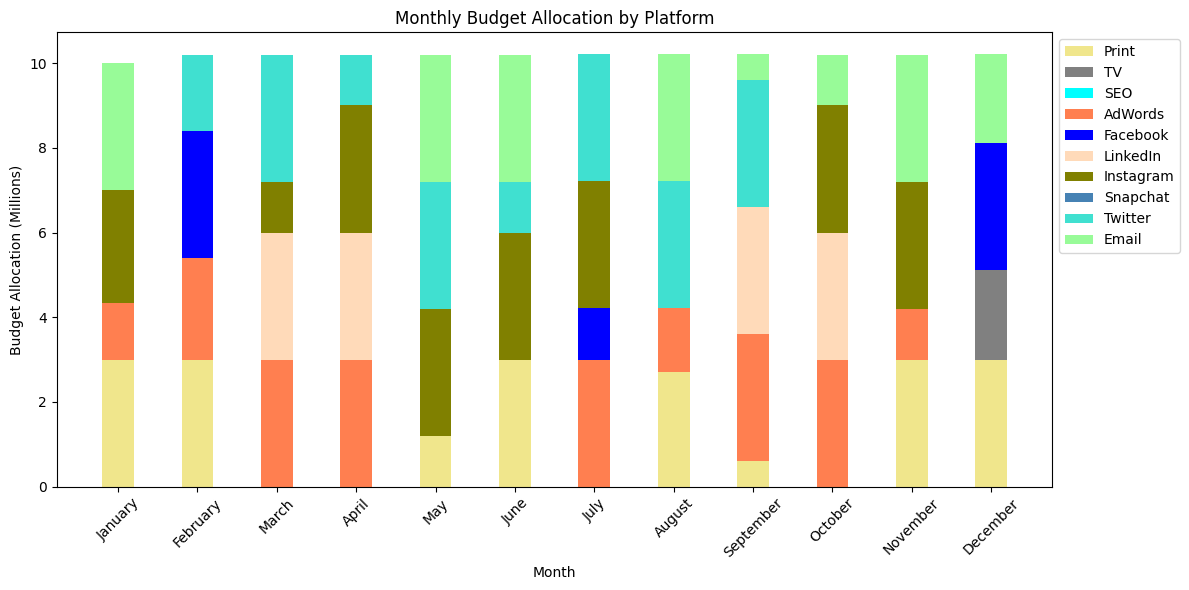

In [104]:
#Plotting a stacked bar chart
#Simple code to plot the stacked chart to show the budget alloction
data = df_monthly_in_millions.drop(columns=['Total Budget']).values.T.tolist()
platforms = df_monthly_in_millions.drop(columns=['Total Budget']).columns.tolist()
months = df_monthly_in_millions.index.tolist()
colors = ['khaki', 'gray','cyan', 'coral', 'blue', 'peachpuff', 'olive', 'steelblue', 'turquoise', 'palegreen']
bar_width = 0.4
fig, ax = plt.subplots(figsize=(12, 6))
bottom = np.zeros(len(months))
for platform, values, color in zip(platforms, data, colors):
    ax.bar(months, values, label=platform, bottom=bottom, color=color, width=bar_width)
    bottom += values
ax.set_xlabel('Month')
ax.set_ylabel('Budget Allocation (Millions)')
ax.set_title('Monthly Budget Allocation by Platform')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

# Task 8

A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M.

**Is the allocation you found stable?**

**Answer:**

The provided budget allocation is **not stable** because it doesn't ensure that the monthly change in spending for each platform is no more than $1 million as evident from the table above.

For example, for the 'Print' media we can see that it stays consistent at USD 3M spend from Jan to March with hardly any change but suddenly drop to 0 in April which is >$1M change. There are many occurences that we can see in the table which indicates that this is not a stable allocation.


**Q :If it isn’t, you do not need to solve a new optimization model. Describe how you might model this?**


To model this stability constraint, we can add constraints to limit the monthly changes in spending for each platform by introducing additional decision variables representing the changes in spending for each platform from one month to the next.

**Design of the solution**:

A] Number of decision variables:
1. One for each month : 12
2. One for each platform : 10
3. Hence, total decision variables we would need: 120

B] Number of constraints:

1. For each month-platform combination we would have to have a constraint which checks that change is not exceeding 1M

e.g. Feb['Print]- Jan ['Print] <= $1M

Existing constraints are still in place and hence
2. Total spend less than $10M for each month (12)
3. Similarly for other 2 constraints as well for Social Media one and Print/TV and Facebbok/Email i.e. (12*2 such constraints =24)
4. Each month-channel should not have more than USD 3M (120 constraints)
5. Non-negativity constraints for all decision variables (120)
